In [1]:
# importing pandas
import pandas as pd

# csv file location
url = 'https://dq-content.s3.amazonaws.com/291/f500.csv'

# making data frame from csv file
data = pd.read_csv(url, index_col = 'company')

# drop NaN
data.dropna()

,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity
company,,,,,,,,,,,,,,,,
Walmart,1,485873,0.8,13643.0,198825,-7.2,C. Douglas McMillon,General Merchandisers,Retailing,1,USA,"Bentonville, AR",http://www.walmart.com,23,2300000,77798
State Grid,2,315199,-4.4,9571.3,489838,-6.2,Kou Wei,Utilities,Energy,2,China,"Beijing, China",http://www.sgcc.com.cn,17,926067,209456
Sinopec Group,3,267518,-9.1,1257.9,310726,-65.0,Wang Yupu,Petroleum Refining,Energy,4,China,"Beijing, China",http://www.sinopec.com,19,713288,106523
China National Petroleum,4,262573,-12.3,1867.5,585619,-73.7,Zhang Jianhua,Petroleum Refining,Energy,3,China,"Beijing, China",http://www.cnpc.com.cn,17,1512048,301893
Toyota Motor,5,254694,7.7,16899.3,437575,-12.3,Akio Toyoda,Motor Vehicles and Parts,Motor Vehicles & Parts,8,Japan,"Toyota, Japan",http://www.toyota-global.com,23,364445,157210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Teva Pharmaceutical Industries,496,21903,11.5,329.0,92890,-79.3,Yitzhak Peterburg,Pharmaceuticals,Health Care,0,Israel,"Petach Tikva, Israel",http://www.tevapharm.com,1,56960,33337
New China Life Insurance,497,21796,-13.3,743.9,100609,-45.6,Wan Feng,"Insurance: Life, Health (stock)",Financials,427,China,"Beijing, China",http://www.newchinalife.com,2,54378,8507
Wm. Morrison Supermarkets,498,21741,-11.3,406.4,11630,20.4,David T. Potts,Food and Drug Stores,Food & Drug Stores,437,Britain,"Bradford, Britain",http://www.morrisons.com,13,77210,5111


# Aggregation and grouping

An essential piece of analysis of large data is efficient summarization: computing aggregations like `sum()`, `mean()`, `median()`, `min()` and `max()`, in which a single number gives insight into the nature of a potentially large dataset.

## Simple Aggregation

Earlier we explored some of the data aggregations available for NumPy arrays.

As with a one-dimensional NumPy array, for a Pandas Series the aggregates return a single value.

For a DataFrame, by default the aggregates return results within each column.

Pandas Series and DataFrame include all of the common aggregates presented in NumPy.

### List of Pandas aggregation methods

These are all methods of DataFrame and Series objects.

|Aggregation|Description|
|---|---|
|count()|Total number of items|
|first(), last()|First and last item|
|mean(), median()|Mean and median|
|min(), max()|Minimum and maximum|
|std(), var()|Standard deviation and variance|
|mad()|Mean absolute deviation|
|prod()|Product of all items|
|sum()|Sum of all items|

**Example**

In [2]:
# data selection
data_selection = data[['revenues', 'profits']]

# data aggregation
data_aggregation = data_selection.sum()

data_aggregation

,0
revenues,27708179.0
profits,1524546.4


### Multiple Aggregation

The `agg()` method performs aggregation operations on Series, DataFrames, or GroupBy objects. It is an alias for the `aggregate()` method.

**Example:**


In [4]:
# data selection
data_selection = data[['revenues', 'profits']]

# data aggregation
data_aggregation = data_selection.agg(['sum', 'mean'])

data_aggregation

,revenues,profits
sum,2.770818e+07,1.524546e+06
mean,5.541636e+04,3.055203e+03


# Value Count

The `value_counts()` method in pandas is used to calculate the frequency distribution of unique values within a `Series` or a `DataFrame` column.

It returns a new `Series` where the index represents the unique values and the values represent their respective counts.

It efficiently counts the occurrences of each distinct value in the `Series` or column.

**Example:** calculate the frequency distribution of unique values within the column named 'sector':

In [ ]:
# calculate the frequency distribution
data['sector'].value_counts()

,count
sector,
Financials,118
Energy,80
Technology,44
Motor Vehicles & Parts,34
Wholesalers,28
Health Care,27
Food & Drug Stores,20
Transportation,19
Telecommunications,18


**Normalization**

The `normalize=True` parameter can be used to return the relative frequencies (percentages) instead of the raw counts, by dividing each count by the total number of non-missing values.

**Example:** calculate the relative frequency distribution (percentages) of unique values within the column named 'sector':

In [ ]:
# calculate the relative frequency distribution
data['sector'].value_counts(normalize=True)

,proportion
sector,
Financials,0.236
Energy,0.160
Technology,0.088
Motor Vehicles & Parts,0.068
Wholesalers,0.056
Health Care,0.054
Food & Drug Stores,0.040
Transportation,0.038
Telecommunications,0.036


# GroupBy: split, apply, combine

Simple aggregations can give a flavor of the dataset, but often we would prefer to aggregate conditionally on some label or index

This is implemented in the so-called `groupby` operation.

The name “group by” comes from a command in the SQL database language, but it is perhaps more illuminative to think of it in the terms: split, apply, combine.

## Split, apply, combine

A canonical example of this split-apply-combine operation, where the “apply” is a summation aggregation, is illustrated in the following figure that makes clear what the GroupBy accomplishes.


<br><br>
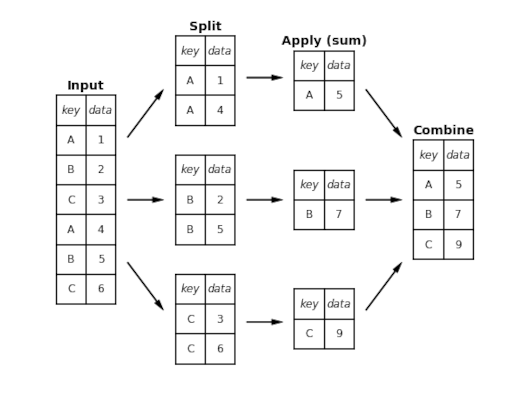
<br><br>

Description of split-apply-combine operation

* The split step involves breaking up and grouping a DataFrame depending on the value of the specified key.
* The apply step involves computing some function, usually an aggregate, transformation, or filtering, within the individual groups.
* The combine step merges the results of these operations into an output array

**Example**

In [ ]:
# data selection
data_selection = data[['sector', 'revenues']]

# data group by key
data_group = data_selection.groupby('sector')

# data aggregation
data_aggregation = data_group.sum()

data_aggregation

,revenues
sector,
Aerospace & Defense,657793
Apparel,74489
Business Services,69640
Chemicals,277332
Energy,4823364
Engineering & Construction,758331
Financials,6509215
Food & Drug Stores,1075670
"Food, Beverages & Tobacco",680105
